## ROC_AUC implementation

In this jupyter lab, I will implement the ROC_AUC calculation. We first implement the ROC curve and then calculate the AUC, which is the area under the curve

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## fake data

## this is the prediction results, each number refers to a probability number
y_pred = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 
                  0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.30, 0.1])

## This is the real target value
y_real = np.array([1,1,0, 1, 1, 1, 0, 0, 1, 0, 1,0, 1, 0, 0, 0, 1 , 0, 1, 0])

In [3]:
## make sure they have the same length:

assert len(y_pred) == len(y_real)

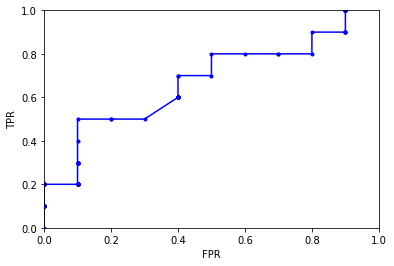

In [4]:
## find the maximum and minimum value of y_pred, remember these numbers are the probabilities of something.
## This is a binary classification problem

pmax = np.max(y_pred)
pmin = np.min(y_pred)

## number of threshold we want to check
th = 100
ths = np.linspace(pmin, pmax, th)

## count all the real positive and real negative
RT = len(y_real[y_real == 1])  ## RT for real true value
RN = len(y_real[y_real == 0])  ## RN for real negative value

## check the number
assert (RT+RN) == len(y_real)

## Keep in mind that ROC_Y = True positive rate = Recall = Sensitivity
## ROC_X = False positive rate = fall out

ROC_Y = np.zeros(th)
ROC_X = np.zeros(th)

for i, th in enumerate(ths):
    
    tp = 0; fp = 0
    for j in range(len(y_real)):
        if (y_pred[j] > th and y_real[j] == 1):
            tp += 1
        elif (y_pred[j] > th and y_real[j]== 0):
            fp += 1
    
    ROC_Y[i] = tp*1.0/RT
    ROC_X[i] = fp*1.0/RN
    

fig, ax = plt.subplots()
ax.plot(ROC_X, ROC_Y, 'b.-')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

plt.show()

In [7]:
## Calculate the AUC of the curve, here we simply use the Riemann integration

auc = np.sum(ROC_Y)/len(ROC_X)
    
print ("The area under the ROC curve is %.2f"%auc)

The area under the ROC curve is 0.54
